In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
import matplotlib.pyplot as plt

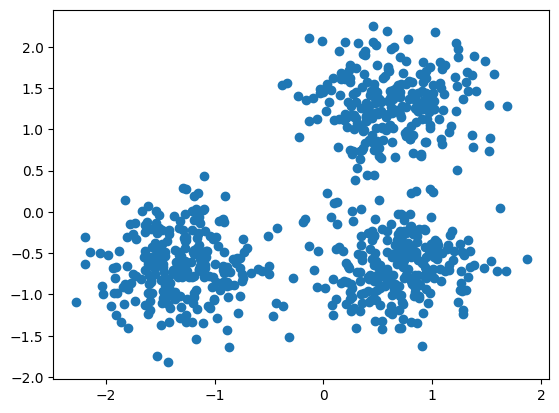

In [4]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers,
cluster_std=0.4, random_state=0)
# Scale and standardize the dataset
X = StandardScaler().fit_transform(X)
xx, yy = zip(*X)
scatter(xx,yy)

show()

In [7]:
# Set up DBSCAN parameters
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples = db.core_sample_indices_
core_samples


array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,
        15,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  77,  78,  79,  80,  81,  83,  84,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 106, 107, 109, 111, 112, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       147, 148, 150, 151, 152, 153, 155, 157, 159, 160, 162, 163, 164,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 197, 198, 199, 200, 201, 203, 204, 205, 20

In [8]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True


In [10]:

labels = db.labels_
labels

# the number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_


3

In [11]:
# if the label equals “-1”, this means the data record is an outlier.
# find the outliers
outliers = X[labels == -1]
outliers

array([[-1.4302079 , -1.82380068],
       [-0.13447918,  2.11039748],
       [ 1.22425496,  0.50161091],
       [ 1.53624088,  0.89460489],
       [ 1.68745105,  1.27830756],
       [-1.53199232, -1.74146844],
       [-0.42227599, -0.19034456],
       [ 1.52307352,  0.74115752],
       [-0.46307453, -1.26531795],
       [ 1.62198217,  0.05020132],
       [ 1.01170962,  0.24102378],
       [-0.43185167, -1.10093485],
       [-0.3164503 , -1.51218921],
       [-2.19229513, -0.30228576],
       [ 0.9807011 ,  0.27373202],
       [-0.86338803, -1.63431796],
       [ 1.87043803, -0.56476419],
       [-0.37447929, -1.13624183]])

In [12]:
# Get the contents of each cluster
cluster1 = X[labels == 0]
cluster1

array([[ 0.49426097,  1.45106697],
       [ 0.33855918,  1.03875871],
       [ 1.1224246 ,  1.77493654],
       [ 1.08247212,  0.8868554 ],
       [ 1.01416668,  1.34114022],
       [ 0.20258715,  1.61104849],
       [ 0.88491334,  1.66591701],
       [ 0.2495873 ,  1.57229126],
       [ 0.47827546,  1.19798226],
       [ 0.52813962,  1.32892751],
       [ 0.7563167 ,  0.92063364],
       [ 0.49282409,  1.78274422],
       [ 0.38051095,  1.24884772],
       [ 0.5419699 ,  1.03090708],
       [ 0.45626317,  2.05788224],
       [ 1.36805202,  1.65962813],
       [ 0.98141038,  1.01828534],
       [ 0.15853059,  1.68427935],
       [ 0.49893333,  1.18944226],
       [ 0.39439246,  1.10697669],
       [ 0.36316812,  1.90748257],
       [ 0.34656878,  1.26411863],
       [ 0.23551504,  1.71737552],
       [ 0.46750573,  0.45045933],
       [ 0.01988339,  1.48714817],
       [ 0.18999226,  1.10986299],
       [ 1.48201718,  1.82713556],
       [ 0.40314456,  1.57028295],
       [ 0.97262049,

In [13]:
# Get the contents of each cluster
cluster2 = X[labels == 1]
cluster2

array([[-1.42808099, -0.83706377],
       [-1.2615699 ,  0.27188135],
       [-1.30154775, -0.76206203],
       [-1.21578196, -0.60102124],
       [-1.25021783, -1.0576165 ],
       [-1.05160416, -0.78008416],
       [-0.78329914, -1.2248967 ],
       [-0.91630085, -0.4808304 ],
       [-0.50601383, -0.29571545],
       [-1.38551399, -0.73950655],
       [-1.15374916, -0.25050793],
       [-1.19268844, -0.51024012],
       [-1.85804701, -1.33021784],
       [-0.91802448, -0.65215736],
       [-1.2832622 , -0.63402691],
       [-1.4601348 , -0.72283473],
       [-1.4800029 , -1.0994804 ],
       [-2.19020872, -0.63058897],
       [-1.07505212, -0.47405025],
       [-1.58709404, -0.54480732],
       [-1.60725507,  0.07074744],
       [-1.53337706, -0.57008755],
       [-1.13848133, -0.06598814],
       [-1.18662196, -0.78239641],
       [-1.14222916, -0.39846161],
       [-1.18845712,  0.19115116],
       [-1.58852748, -0.81918198],
       [-1.04572998, -0.29002721],
       [-1.30489684,

In [14]:
# Get the contents of each cluster
cluster3 = X[labels == 2]
cluster3

array([[ 0.11900101, -1.05397553],
       [ 0.58569865, -0.33910463],
       [ 1.15263449, -0.64853991],
       [ 0.43642618, -1.06597144],
       [ 0.46803417, -0.97411022],
       [ 0.52235479, -0.64169589],
       [ 0.94533367, -0.54388095],
       [ 0.94661474, -0.93985476],
       [ 0.4935727 , -0.94982524],
       [ 1.02800263, -0.3400815 ],
       [ 0.85504851, -0.48102831],
       [-0.16699918, -0.0916528 ],
       [ 0.86251296, -0.2912265 ],
       [ 0.82448833, -0.26403988],
       [ 1.32708273, -0.34507151],
       [ 0.68614239, -0.49008659],
       [ 1.04911258, -0.57443596],
       [ 0.73193309, -0.60806818],
       [ 0.22246258, -0.65053906],
       [ 0.35771746, -0.58492415],
       [ 0.58808627, -0.23028361],
       [ 0.78242147, -0.38041776],
       [ 1.26820939, -0.85701991],
       [ 0.54956799, -0.77393131],
       [ 0.70783906, -0.23321162],
       [ 0.01656517, -0.92384418],
       [ 0.52298152, -0.91528114],
       [ 0.9660395 , -0.43181194],
       [ 0.64879079,